In [1]:
import networkx as nx
import numpy as np
from networkx.algorithms import approximation
from networkx.algorithms import reciprocity
import matplotlib.pyplot as plt
from collections import Counter
import random
from itertools import combinations, groupby
from node2vec import Node2Vec
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import statistics
from sklearn.metrics import accuracy_score, classification_report
%matplotlib inline

In [2]:
def node2vec_from_graph(G, D):
    node2vec = Node2Vec(G, dimensions=D)
    model = node2vec.fit()
    embeddings = model.wv.vectors
    return embeddings

In [3]:
def read_circles(file_path):
    with open(file_path) as f :
        content = f.readlines()
        content = [line.replace("\n","") for line in content]
        content = [line.split("\t") for line in content]
    return {circle[0]:list(map(int,circle[1:])) for circle in content}

In [4]:
def get_circle_labels(G,circles):
    circle_labels = []
    for node in G.nodes():
        is_added = False
        for i,li in enumerate(list(circles.values())):
            if node in li and not is_added:
                circle_labels.append(i)
                is_added = True
        if not is_added:
            circle_labels.append(-1)
    return circle_labels

In [5]:
G = nx.read_edgelist('0.edges', nodetype=int)

In [6]:
circles = read_circles("0.circles")

In [7]:
embeddings = node2vec_from_graph(G,30)

Computing transition probabilities:   0%|          | 0/333 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  7.81it/s]


In [8]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(embeddings)

C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, get_circle_labels(G, circles), test_size=0.33, random_state=42)


## RANDOM FOREST SONUCU

In [10]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.35454545454545455

## Gradient Boosting Machines (GBM) SONUCU

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğitin
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Sınıflandırma raporunu yazdırın
print(classification_report(y_test, y_pred))

Accuracy: 0.27
              precision    recall  f1-score   support

          -1       0.22      0.09      0.13        22
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.12      0.33      0.18         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.42      0.68      0.52        40
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         2
          18

C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_cla

## AdaBoost (Adaptive Boosting) SONUCU

In [12]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Modeli eğitin
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Sınıflandırma raporunu yazdırın
print(classification_report(y_test, y_pred))

Accuracy: 0.35
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        22
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.36      0.97      0.53        40
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         0
          19

C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_cla

## XGBoost (Extreme Gradient Boosting) SONUCU

In [13]:
import xgboost as xgb
# XGBoost modelini tanımlayın
xg_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Modeli eğitin
xg_clf.fit(X_train, y_train)
y_pred = xg_clf.predict(X_test)

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Sınıflandırma raporunu yazdırın
print(classification_report(y_test, y_pred))

Accuracy: 0.05
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        22
           0       0.12      1.00      0.22         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.01      1.00      0.03         1
          15       1.00      0.05      0.10        40
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20

C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LightGBM SONUCU

In [14]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğitin
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Sınıflandırma raporunu yazdırın
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 30
[LightGBM] [Info] Start training from score -1.880811
[LightGBM] [Info] Start training from score -2.573958
[LightGBM] [Info] Start training from score -3.797734
[LightGBM] [Info] Start training from score -4.714025
[LightGBM] [Info] Start training from score -2.768114
[LightGBM] [Info] Start training from score -5.407172
[LightGBM] [Info] Start training from score -2.768114
[LightGBM] [Info] Start training from score -4.714025
[LightGBM] [Info] Start training from score -5.407172
[LightGBM] [Info] Start training from score -3.797734
[LightGBM] [Info] Start training from score -4.714025
[LightGBM] [Info] Start training from score -2.573958
[LightGBM] [Info] Start training from score -5.407172
[LightGBM] 

C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CatBoost SONUCU

In [15]:
from catboost import CatBoostClassifier
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_seed=42, verbose=0)

# Modeli eğitin
cat_clf.fit(X_train, y_train)
# Test verileri üzerinde tahminler yapın
y_pred = cat_clf.predict(X_test)

# Doğruluk oranını hesaplayın
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Sınıflandırma raporunu yazdırın
print(classification_report(y_test, y_pred))


Accuracy: 0.02
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        22
           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.01      1.00      0.02         1
          15       1.00      0.03      0.05        40
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20

C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gamze\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


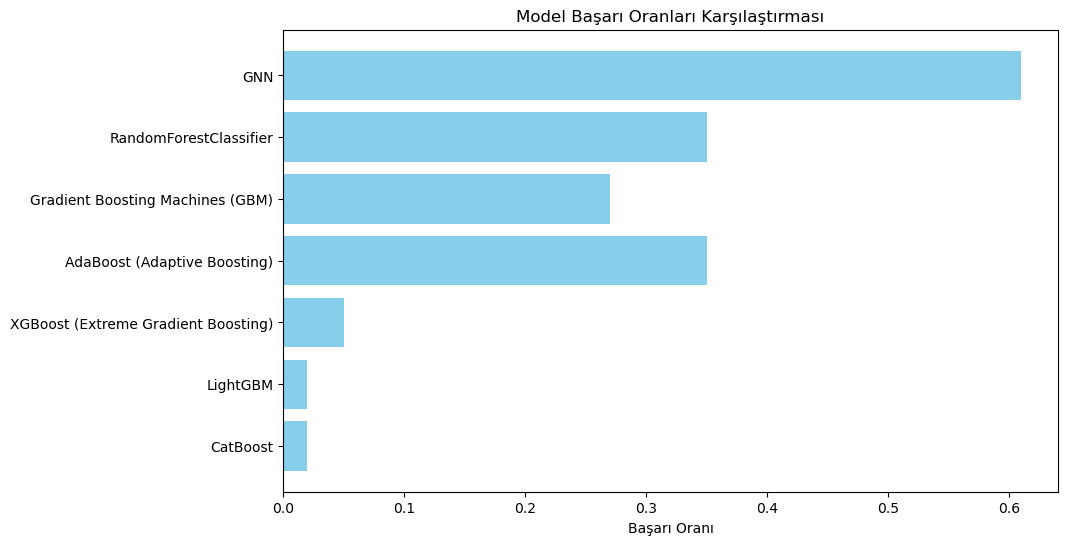

In [17]:
import matplotlib.pyplot as plt

# Model başarı oranlarını içeren sözlük
dict_models = {
    "GNN": 0.61,
    "RandomForestClassifier": 0.35,
    "Gradient Boosting Machines (GBM)": 0.27,
    "AdaBoost (Adaptive Boosting)": 0.35,
    "XGBoost (Extreme Gradient Boosting)": 0.05,
    "LightGBM": 0.02,
    "CatBoost": 0.02,
}

# Model isimlerini ve başarı oranlarını ayrı listelere ayıralım
models = list(dict_models.keys())
scores = list(dict_models.values())

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.barh(models, scores, color='skyblue')
plt.xlabel('Başarı Oranı')
plt.title('Model Başarı Oranları Karşılaştırması')
plt.gca().invert_yaxis()  # En yüksek başarı oranını üstte göstermek için y eksenini ters çevir
plt.show()
